In [41]:
#Imported libraries
import cv2
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [42]:
def non_maximum_suppression (image, theta):
    X, Y = image.shape # X,Y assigned image shape X = 335 Y = 502
    Z = np.zeros((X,Y), dtype=np.int32) # Create Empty that shape is  X,Y
    angle = theta * 180 / np.pi
    
    for i in range (0,X-1) : # This for loop adds +180 to negative angles and makes it positive.
        for j in range (1,Y-1):
            if (angle[i][j]<0):
                while angle[i][j]<0:
                    angle[i][j] += 180
                
                
    
    for i in range(1,X-1):
        for j in range(1,Y-1):
            try:
                q = 255
                r = 255
                # if the angle at each pixel is within a range set
                # the comparison pixels equal to the corresponding line
                # If angle not within then set that non-max image
                # pixel point to zero and keep pixel comparisons at max of 255
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = image[i, j+1]
                    r = image[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = image[i+1, j-1]
                    r = image[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = image[i+1, j]
                    r = image[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = image[i-1, j-1]
                    r = image[i+1, j+1]

                if (image[i,j] >= q) and (image[i,j] >= r):
                    Z[i,j] = image[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e: #Ignore error
                pass
    
    return Z

In [43]:
def double_threshold(image,low=.05,high=.09):
    highThresh=image.max()*high # Calculate high Thresh
    lowThresh=highThresh*low # Calculate low Thresh
    
    X,Y=image.shape
    thresholding_image=np.zeros((X,Y),dtype=np.int32)
    
    weakEdge=np.int32(20) # weak edge array
    strongEdge=np.int32(255) # strong edge array
    
    strongEdge_i,strongEdge_j=np.where(image>=highThresh)# strongEdge_i and strongEdge_j (i,j) found
    weakEdge_i,weakEdge_j=np.where((image<=highThresh) & (image>=lowThresh))# weakEdge_i and weakEdge_j (i,j) found
    thresholding_image[strongEdge_i,strongEdge_j]=strongEdge # Assign strong edge 
    thresholding_image[weakEdge_i,weakEdge_j]=weakEdge # Assign weak edge
    
    return thresholding_image,strongEdge, weakEdge;

In [44]:
def hysteresis(image,weak,strong):
    X,Y=image.shape # Assign image shape to X, Y 
    for i in range(1,X-1):
        for j in range(1,Y-1):
            try:
                if image[i,j]==weak:
                    if ((image[i+1, j-1] == strong) or (image[i+1, j] == strong) or (image[i+1, j+1] == strong) or (image[i, j-1] == strong) or (image[i, j+1] == strong) or (image[i-1, j-1] == strong) or (image[i-1, j] == strong) or (image[i-1, j+1] == strong)):
                        # If one of the 8 neighbors of the weak edge is strong, the weak edge assigned to strong edge.
                        image[i, j] = strong
                    else:
                        image[i, j] = 0 # Else, weak edge assigned to 0
            except IndexError as e: # Ignore error
                pass
    return image

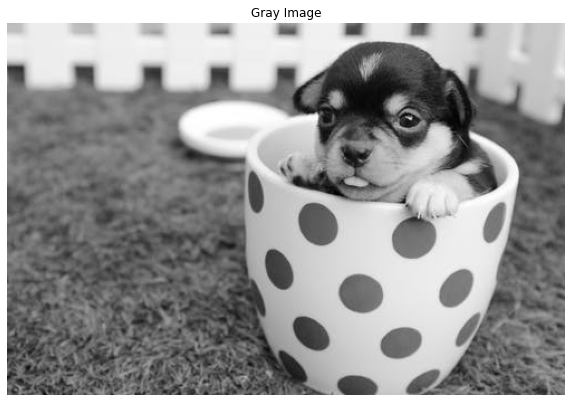

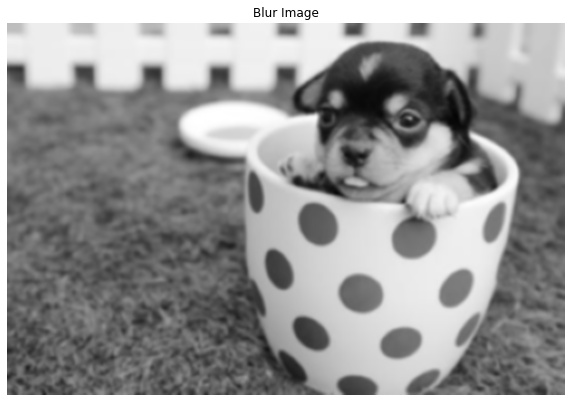

In [45]:
image = cv2.imread('C:/Users/SELCUK/Desktop/assignment_2/chihuahua-dog-puppy-cute-39317_small.jpeg')#read image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)# convert to gray
blur = cv2.GaussianBlur(gray,(5,5),1.4)# Gaussian filter
plt.figure(figsize=(10, 10))#İmage size 
plt.imshow(cv2.cvtColor(gray,  cv2.COLOR_BGR2RGB))#Displaying RGB color digital image file (Matplotlib (BGR -> RGB))
plt.title('Gray Image')
plt.axis('off')
plt.figure(figsize=(10, 10))#İmage size 
plt.imshow(cv2.cvtColor(blur,  cv2.COLOR_BGR2RGB))#Displaying RGB color digital image file (Matplotlib (BGR -> RGB))
plt.title('Blur Image')
plt.axis('off')
plt.show()

[[-189. -189.    0. ...   -3.  212.  213.]
 [-567. -567.    0. ...   -9.  636.  639.]
 [-757. -757.    0. ...  -12.  848.  852.]
 ...
 [-390. -392.    6. ...  -15.  478.  482.]
 [-300. -301.    5. ...  -12.  353.  356.]
 [-101. -101.    2. ...   -4.  117.  118.]]


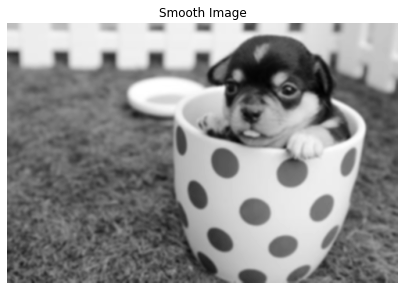

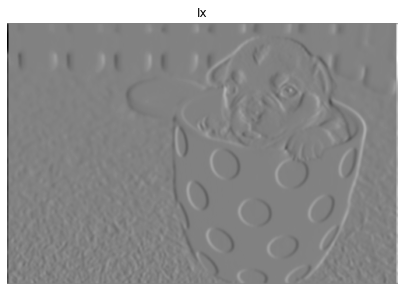

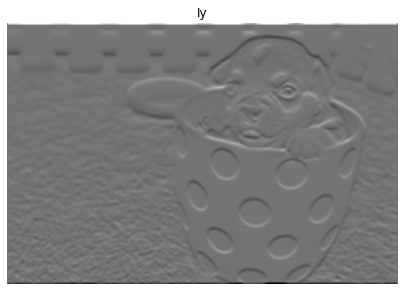

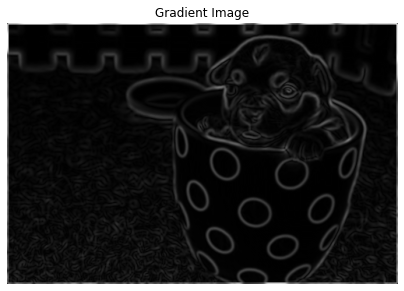

In [46]:
smooth_image=blur.copy()
x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]],np.float32)
y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]],np.float32)

Ix=signal.convolve2d(smooth_image,x)
Iy=signal.convolve2d(smooth_image,y)
#Calculate the gradient magnitude
G= np.sqrt(Ix ** 2 + Iy ** 2)
theta = np.arctan2(Iy,Ix)


plt.figure(figsize=(7, 7))#İmage size 
plt.title('Smooth Image')
plt.imshow(smooth_image,cmap = 'gray')
plt.axis('off')

plt.figure(figsize=(7, 7))#İmage size 
plt.title('Ix')
print(Ix)
plt.imshow(Ix,cmap = 'gray')
plt.axis('off')

plt.figure(figsize=(7, 7))#İmage size 
plt.title('Iy')

plt.imshow(Iy,cmap = 'gray')
plt.axis('off')

plt.figure(figsize=(7, 7))#İmage size 
plt.title('Gradient Image')
plt.imshow(G,cmap = 'gray')
plt.axis('off')
plt.show()

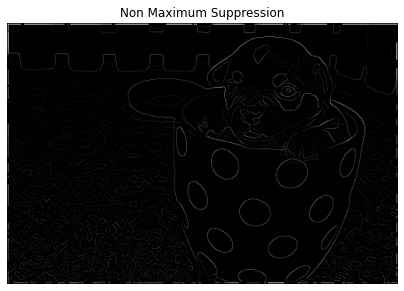

In [47]:
non_max_sup=non_maximum_suppression(G,theta)
plt.figure(figsize=(7, 7))#İmage size 
plt.title('Non Maximum Suppression')
plt.imshow(non_max_sup,cmap = 'gray')
plt.axis('off')
plt.show()

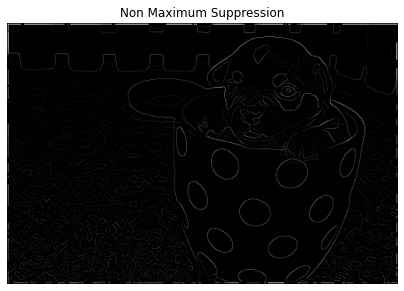

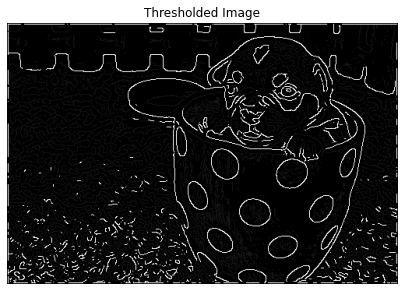

In [48]:
thresholdedImage,strong,weak=double_threshold(non_max_sup)
plt.figure(figsize=(7, 7))#İmage size 
plt.title('Non Maximum Suppression')
plt.imshow(non_max_sup,cmap = 'gray')
plt.axis('off')

plt.figure(figsize=(7, 7))#İmage size 
plt.title('Thresholded Image')
plt.imshow(thresholdedImage,cmap = 'gray')
plt.axis('off')
plt.show()

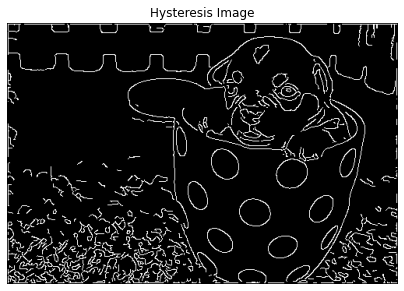

In [49]:
hysteresis_image = hysteresis(thresholdedImage,weak,strong)
plt.figure(figsize=(7, 7))#İmage size 
plt.title('Hysteresis Image')
plt.imshow(hysteresis_image,cmap = 'gray')
plt.axis('off')
plt.show()

In [219]:
cv2.imwrite('C:/Users/SELCUK/Desktop/assignment_2/Final_Image.jpeg', hysteresis_image)

True